ROC, AUC, Precision–Recall

Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


Data Cleaning & Feature Engineering

In [2]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


/tmp/ipython-input-2029780129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2029780129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Select Features & Target

In [3]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']


Train-Test Split + Scaling (Logistic Regression)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Model

In [5]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

Predictions & Probabilities

In [6]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability of survival


Core Evaluation Metrics

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8044692737430168
Precision: 0.8
Recall: 0.7027027027027027
F1 Score: 0.7482014388489209


    When to use what?

    Precision → False positives are costly

    Recall → False negatives are costly

    F1 → Balance between Precision & Recall

ROC Curve & AUC

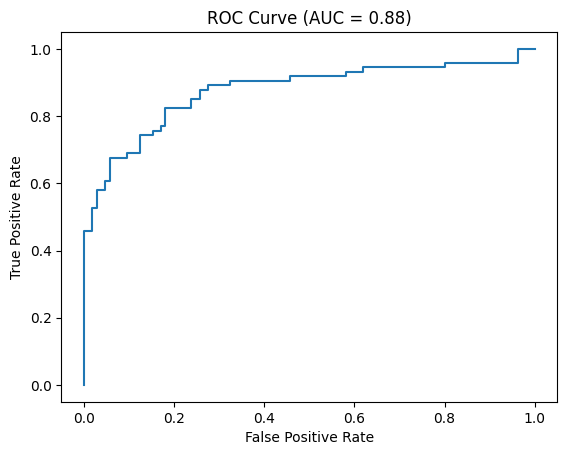

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.show()


AUC close to 1 → excellent model

Precision–Recall Curve

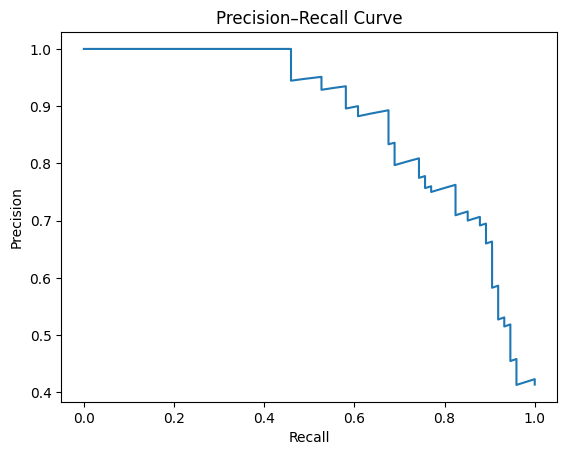

In [9]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


Better than ROC for imbalanced datasets

Extra: Compare Models by AUC

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob))
print("Random Forest AUC:", roc_auc_score(y_test, rf_prob))


Logistic Regression AUC: 0.8761904761904761
Random Forest AUC: 0.8854568854568854
